In [1]:
!pip3 install -U ucimlrepo

In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo, list_available_datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [3]:
nursery = fetch_ucirepo(id=76) 

In [4]:
X = nursery.data.features 
y = nursery.data.targets 

In [5]:
df = pd.DataFrame(data=X, columns=nursery.data.feature_names)
df['target'] = y
df

,parents,has_nurs,form,children,housing,finance,social,health,target
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [6]:
df['target'].value_counts()

target
not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: count, dtype: int64

In [31]:
df['parents'].value_counts()

parents
usual          4320
pretentious    4320
great_pret     4320
Name: count, dtype: int64

In [7]:
binary_df = df.copy()

In [8]:
def isRecommend(val):
    if val == 'not_recom':
        return val
    return 'recommend'

binary_df['target'] = df['target'].apply(isRecommend) 

In [9]:
binary_df['target'].value_counts()

target
recommend    8640
not_recom    4320
Name: count, dtype: int64

In [10]:
binary_df['health'].value_counts()

health
recommended    4320
priority       4320
not_recom      4320
Name: count, dtype: int64

In [11]:
df_encoded = pd.get_dummies(binary_df, drop_first=True, dtype='int')
df_encoded

,parents_pretentious,parents_usual,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_completed,form_foster,form_incomplete,children_2,children_3,children_more,housing_critical,housing_less_conv,finance_inconv,social_problematic,social_slightly_prob,health_priority,health_recommended,target_recommend
0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
4,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0,1
12956,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0
12957,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,1,0,0,1,1
12958,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,1,0,1,0,1


In [12]:
X_encoded = df_encoded.drop('target_recommend', axis=1)
y_encoded = df_encoded['target_recommend']
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, random_state=1)

In [13]:
model = RandomForestClassifier(random_state=1)

In [14]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [15]:
model.score(X_test, y_test)

1.0

In [16]:
accuracy_score(y_test, model.predict(X_test))

1.0

In [17]:
sum(model.feature_importances_)


1.0

In [18]:
model.feature_importances_

array([0.00299835, 0.00278493, 0.0020042 , 0.00181644, 0.00227344,
       0.00214519, 0.00252027, 0.00239395, 0.00234079, 0.00220763,
       0.00216981, 0.00212305, 0.00292467, 0.00291862, 0.00390672,
       0.00368118, 0.00324679, 0.48769236, 0.46785162])

In [19]:
column_names = X_train.columns
# Create a dictionary to map column names to feature importances
importance_dict = dict(zip(column_names, model.feature_importances_))

# Print the feature importances with column names
for feature, importance in importance_dict.items():
    print(f"{feature}: {importance}")

parents_pretentious: 0.0029983500316205945
parents_usual: 0.0027849337445849435
has_nurs_improper: 0.002004200226921632
has_nurs_less_proper: 0.0018164371676570059
has_nurs_proper: 0.002273440976867203
has_nurs_very_crit: 0.002145190510661406
form_completed: 0.002520269516170771
form_foster: 0.0023939490871104185
form_incomplete: 0.002340786816413227
children_2: 0.0022076282769873568
children_3: 0.002169806650946779
children_more: 0.002123045118406424
housing_critical: 0.0029246735476370672
housing_less_conv: 0.002918615361181348
finance_inconv: 0.003906718213445249
social_problematic: 0.003681184866731239
social_slightly_prob: 0.0032467915987206466
health_priority: 0.4876923621002604
health_recommended: 0.4678516161876763


In [20]:
multi_df = df.copy()
multi_df['target'].value_counts()

target
not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: count, dtype: int64

In [21]:
indices = (multi_df['target'] == 'very_recom') | (multi_df['target'] == 'recommend')
multi_df = multi_df.drop(multi_df[indices].index)

In [22]:
multi_df['target'].value_counts()

target
not_recom     4320
priority      4266
spec_prior    4044
Name: count, dtype: int64

In [23]:
X = pd.get_dummies(multi_df.drop('target', axis=1), dtype='int')
X

,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,form_completed,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
1,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
4,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0
5,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,0
6,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
12956,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,0
12957,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
12958,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0


In [24]:
y = pd.get_dummies(multi_df['target'], dtype='int')
y
# y = multi_df['target']

,not_recom,priority,spec_prior
1,0,1,0
2,1,0,0
4,0,1,0
5,1,0,0
6,0,1,0
...,...,...,...
12955,0,0,1
12956,1,0,0
12957,0,0,1
12958,0,0,1


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
model = RandomForestClassifier(random_state=1, n_estimators=512)
# model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=512, random_state=1)

In [27]:
model.score(X_test, y_test)

0.9914502849905004

In [28]:
column_names = X_train.columns
# Create a dictionary to map column names to feature importances
importance_dict = dict(zip(column_names, model.feature_importances_))
importance_list = []
coef_list = []

# Print the feature importances with column names
for feature, importance in importance_dict.items():
    print(f"{feature}: {importance}")
    importance_list.append({feature: importance})
sorted_list = sorted(importance_list, key=lambda x: list(x.values())[0], reverse=True)
sorted_list

parents_great_pret: 0.042758920548269415
parents_pretentious: 0.016660870319615103
parents_usual: 0.031035204873584923
has_nurs_critical: 0.03558409353067404
has_nurs_improper: 0.02306040711785934
has_nurs_less_proper: 0.04065528307440384
has_nurs_proper: 0.03922928568360041
has_nurs_very_crit: 0.05805450377405805
form_complete: 0.008915927622856916
form_completed: 0.0060890055631663345
form_foster: 0.009158303610411842
form_incomplete: 0.005541136867186292
children_1: 0.014340118496313626
children_2: 0.007363698838565948
children_3: 0.00736425093646207
children_more: 0.007369168529263484
housing_convenient: 0.016489337531545207
housing_critical: 0.01208752055116554
housing_less_conv: 0.008027624852882395
finance_convenient: 0.008725686126400166
finance_inconv: 0.009142998722644973
social_nonprob: 0.007200720349335663
social_problematic: 0.020440661293185725
social_slightly_prob: 0.0070840491551997856
health_not_recom: 0.3266107682527841
health_priority: 0.12197662223687555
health_reco

[{'health_not_recom': 0.3266107682527841},
 {'health_priority': 0.12197662223687555},
 {'health_recommended': 0.10903383154168927},
 {'has_nurs_very_crit': 0.05805450377405805},
 {'parents_great_pret': 0.042758920548269415},
 {'has_nurs_less_proper': 0.04065528307440384},
 {'has_nurs_proper': 0.03922928568360041},
 {'has_nurs_critical': 0.03558409353067404},
 {'parents_usual': 0.031035204873584923},
 {'has_nurs_improper': 0.02306040711785934},
 {'social_problematic': 0.020440661293185725},
 {'parents_pretentious': 0.016660870319615103},
 {'housing_convenient': 0.016489337531545207},
 {'children_1': 0.014340118496313626},
 {'housing_critical': 0.01208752055116554},
 {'form_foster': 0.009158303610411842},
 {'finance_inconv': 0.009142998722644973},
 {'form_complete': 0.008915927622856916},
 {'finance_convenient': 0.008725686126400166},
 {'housing_less_conv': 0.008027624852882395},
 {'children_more': 0.007369168529263484},
 {'children_3': 0.00736425093646207},
 {'children_2': 0.00736369883

In [62]:
for coefficients in model.coef_: 
    coef_dict = dict(zip(column_names, coefficients))
    coef_list = []
    
    # Print the feature importances with column names
    for feature, coef in coef_dict.items():
        print(f"{feature}: {coef}")
        coef_list.append({feature: coef})
    # sorted_list = sorted(coef_list, key=lambda x: list(x.values())[0], reverse=True)
    # sorted_list
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
model.classes_

parents_great_pret: 0.07753116945044979
parents_pretentious: -0.1562282727459352
parents_usual: 0.07908445933205521
has_nurs_critical: -0.10756719728155435
has_nurs_improper: -0.2891545738216092
has_nurs_less_proper: 0.10244126527841517
has_nurs_proper: 0.0841069894067126
has_nurs_very_crit: 0.21056087245460903
form_complete: 0.015444939372401547
form_completed: -0.00683380784749052
form_foster: 0.010043795300947607
form_incomplete: -0.01826757078929036
children_1: 0.04104566659112339
children_2: -0.025329211346766273
children_3: -0.004231060567510795
children_more: -0.011098038640279455
housing_convenient: 0.04379569501484249
housing_critical: -0.0023362024626867677
housing_less_conv: -0.04107213651558636
finance_convenient: 0.0015024087154757591
finance_inconv: -0.0011150526789037217
social_nonprob: -0.01725308072432769
social_problematic: 0.032499952095407784
social_slightly_prob: -0.014859515334512038
health_not_recom: 6.359123427688832
health_priority: -3.1885004831450923
health_r

array(['not_recom', 'priority', 'spec_prior'], dtype=object)

In [29]:
y_pred = model.predict(X_test)
y_pred

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0]])

In [30]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

ValueError: multilabel-indicator is not supported

In [46]:
y = df['target']
indices = (y == 'very_recom') | (y == 'recommend')
y = y.drop(y[indices].index)
y = y.replace({'priority': 0, 'not_recom': 1, 'spec_prior': 2})
y

1        0
2        1
4        0
5        1
6        0
        ..
12955    2
12956    1
12957    2
12958    2
12959    1
Name: target, Length: 12630, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [48]:
model = RandomForestClassifier(random_state=1, n_estimators=512)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=512, random_state=1)

In [49]:
model.score(X_test, y_test)


0.9914502849905004

In [51]:
y_pred = model.predict(X_test)

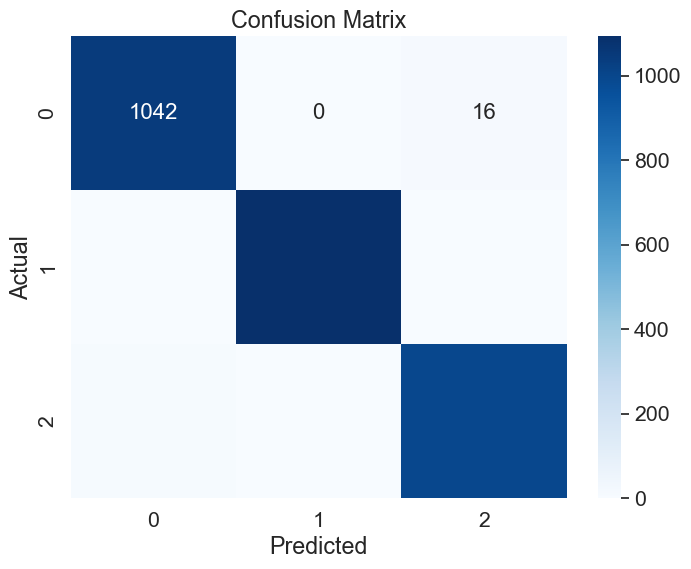

In [52]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4) 
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()